In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.optimize import newton
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar
from scipy.optimize import fsolve
plt.style.use('seaborn-whitegrid')

<ipython-input-1-5c8774f982ff>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


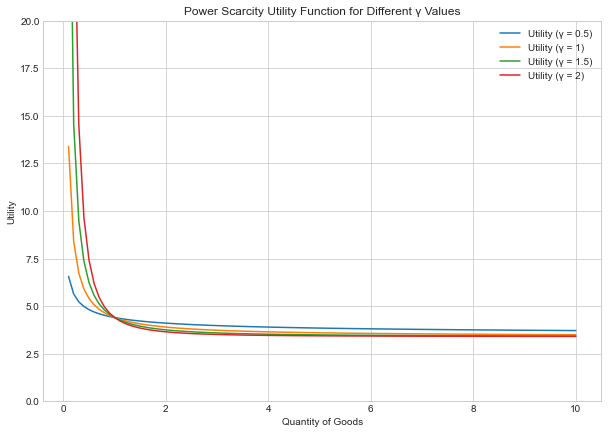

In [2]:
def power_scarcity_utility(quantity, price, A, gamma, B):

    utility_from_quantity = A / np.power(quantity, gamma)
    utility_from_price = B * np.log(price)
    return utility_from_quantity + utility_from_price

A = 1  
B = 1  
price_veblen = 30  
gamma_values = [0.5, 1, 1.5, 2]  

quantities = np.linspace(0.1, 10, 100)
plt.figure(figsize=(10, 7))
for gamma in gamma_values:
    utilities = power_scarcity_utility(quantities, price_veblen, A, gamma, B)
    plt.plot(quantities, utilities, label=f'Utility (γ = {gamma})')

plt.title('Power Scarcity Utility Function for Different γ Values')
plt.xlabel('Quantity of Goods')
plt.ylabel('Utility')
plt.legend()
plt.grid(True)
plt.ylim(0, 20)

plt.show()


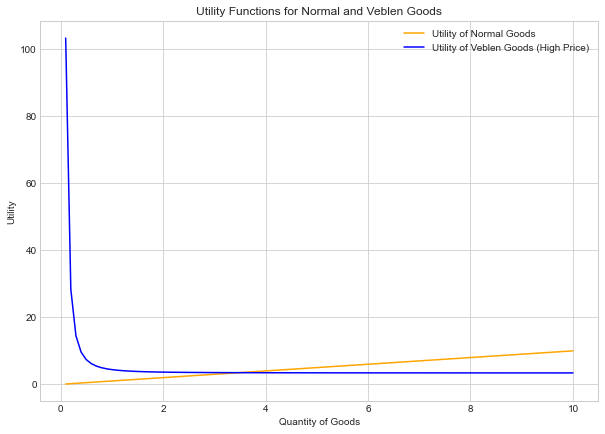

In [3]:
def normal_goods_utility(quantity, alpha):
    return quantity**alpha

alpha_normal = 1 
price_veblen = 30
gamma = 2 

utilities_normal = normal_goods_utility(quantities, alpha_normal)
utilities_veblen = power_scarcity_utility(quantities, price_veblen, A, gamma, B)


plt.figure(figsize=(10, 7))
plt.plot(quantities, utilities_normal, label='Utility of Normal Goods', color='orange')
plt.plot(quantities, utilities_veblen, label='Utility of Veblen Goods (High Price)', color='blue')
plt.title('Utility Functions for Normal and Veblen Goods')
plt.xlabel('Quantity of Goods')
plt.ylabel('Utility')
plt.legend()
plt.grid(True)

plt.show()


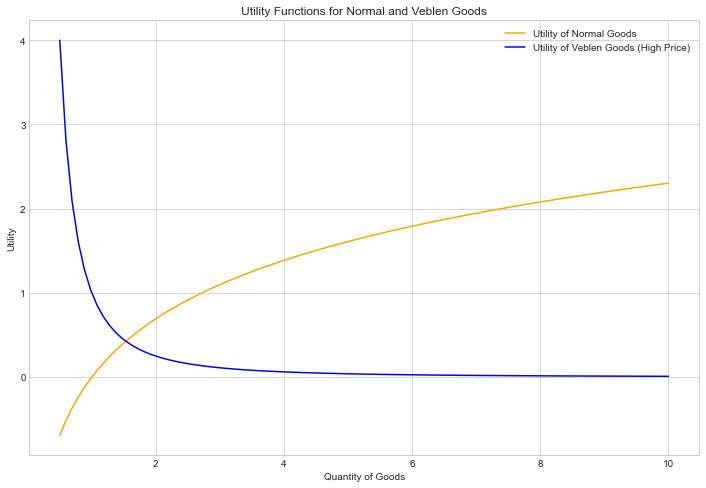

In [4]:
def normal_goods_utility2(quantity):
    return np.log(quantity)

price_veblen = 1 
gamma = 2

quantities = np.linspace(0.5, 10, 100)
utilities_normal = normal_goods_utility2(quantities)
utilities_veblen = power_scarcity_utility(quantities, price_veblen, A, gamma, B)


plt.figure(figsize=(12, 8))
plt.plot(quantities, utilities_normal, label='Utility of Normal Goods', color='orange')
plt.plot(quantities, utilities_veblen, label='Utility of Veblen Goods (High Price)', color='blue')

plt.title('Utility Functions for Normal and Veblen Goods')
plt.xlabel('Quantity of Goods')
plt.ylabel('Utility')
plt.legend()
plt.grid(True)
plt.show()


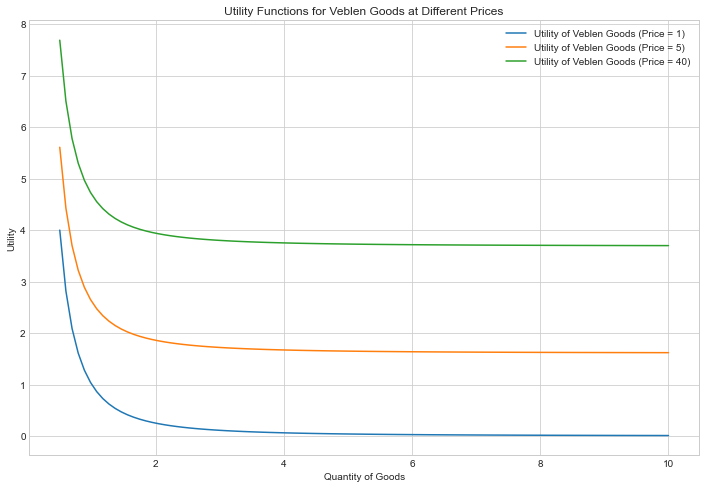

In [5]:
prices = [1, 5, 40] 

plt.figure(figsize=(12, 8))

for price in prices:
    utilities_veblen = power_scarcity_utility(quantities, price, A, gamma, B)
    plt.plot(quantities, utilities_veblen, label=f'Utility of Veblen Goods (Price = {price})')

plt.title('Utility Functions for Veblen Goods at Different Prices')
plt.xlabel('Quantity of Goods')
plt.ylabel('Utility')
plt.legend()
plt.grid(True)

plt.show()


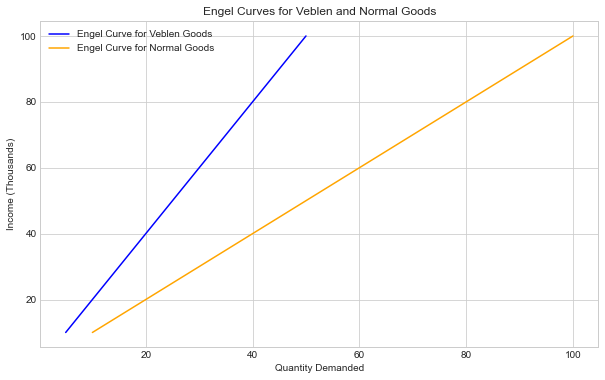

In [6]:
def veblen_engel_curve(income, price_sensitivity):
    return price_sensitivity * income

def normal_engel_curve(income, price_sensitivity):
    return price_sensitivity * income

price_sensitivity_veblen = 0.5  
price_sensitivity_normal = 1 

income_levels = np.linspace(10, 100, 50)

quantities_demanded_veblen = veblen_engel_curve(income_levels, price_sensitivity_veblen)
quantities_demanded_normal = normal_engel_curve(income_levels, price_sensitivity_normal)

plt.figure(figsize=(10, 6))
plt.plot(quantities_demanded_veblen, income_levels, label='Engel Curve for Veblen Goods', color='blue')
plt.plot(quantities_demanded_normal, income_levels, label='Engel Curve for Normal Goods', color='orange')
plt.ylabel('Income (Thousands)')
plt.xlabel('Quantity Demanded')
plt.title("Engel Curves for Veblen and Normal Goods")
plt.legend()
plt.grid(True)

plt.show()


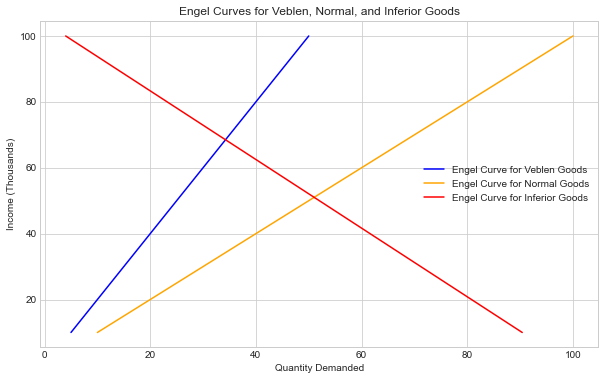

In [7]:
def inferior_engel_curve(income, base_quantity, income_sensitivity):
    return base_quantity - income_sensitivity * income

base_quantity_inferior = 100  
income_sensitivity_inferior = 0.96

quantities_demanded_inferior = inferior_engel_curve(income_levels, base_quantity_inferior, income_sensitivity_inferior)

plt.figure(figsize=(10, 6))
plt.plot(quantities_demanded_veblen, income_levels, label='Engel Curve for Veblen Goods', color='blue')
plt.plot(quantities_demanded_normal, income_levels, label='Engel Curve for Normal Goods', color='orange')
plt.plot(quantities_demanded_inferior, income_levels, label='Engel Curve for Inferior Goods', color='red')
plt.ylabel('Income (Thousands)')
plt.xlabel('Quantity Demanded')
plt.title("Engel Curves for Veblen, Normal, and Inferior Goods")
plt.legend()
plt.grid(True)
plt.show()


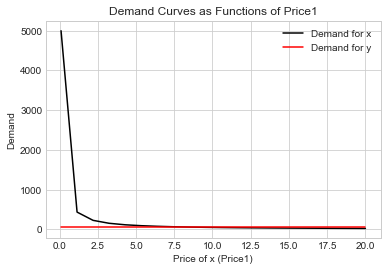

In [8]:
def utility_derivative_x(x, *args):
    income, price1, price2 = args
    y = (income - price1 * x) / price2
    if y <= 0:
        return np.inf 
    return 1 - price1 / (income - price1 * x)

def mydemand(income, price1, price2):
    start_x = max(0.1, income / (2 * price1))
    try:
        optimal_x = newton(utility_derivative_x, start_x, args=(income, price1, price2))
        optimal_y = (income - price1 * optimal_x) / price2
        if optimal_y <= 0:
            raise ValueError("Non-positive y computed, invalid result.")
    except RuntimeError:
        return np.nan, np.nan
    return optimal_x, optimal_y

income = 1000
price2 = 7 

prices = np.linspace(0.1, 20, 20)
demandx = np.zeros(20)
demandy = np.zeros(20)

for i in range(20):
    demandx[i], demandy[i] = mydemand(income, prices[i], price2)

plt.plot(prices, demandx, '-k', label='Demand for x')
plt.plot(prices, demandy, '-r', label='Demand for y')

plt.xlabel('Price of x (Price1)')
plt.ylabel('Demand')
plt.title('Demand Curves as Functions of Price1')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-9-3096e1e6b66c>:16: RuntimeWarning: invalid value encountered in log
  return x + np.log(y)


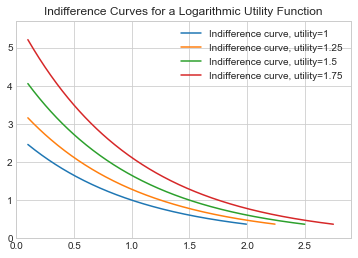

In [9]:
x = np.linspace(0.1, 10, 1000)

y1 = np.zeros_like(x)
y2 = np.zeros_like(x)
y3 = np.zeros_like(x)
y4 = np.zeros_like(x)

def myutility(x, y):
    return x + np.log(y)

def our_newton_solver(funcname, startvalue, arglist):
    current = startvalue
    for _ in range(1000):  
        fval = funcname(current, arglist)
        grad = (funcname(current + 0.5 * 1e-5, arglist) - funcname(current - 0.5 * 1e-5, arglist)) * 1e+5
        if abs(fval) < 1e-8:
            break
        current = current - fval / grad
    return current

def indiff1(y, mylist):
    x, util = mylist
    ut = myutility(x, y)
    return ut - util

def indiff(x, util):
    return our_newton_solver(indiff1, 1, [x, util])

for i, element in enumerate(x):
    y1[i] = indiff(element, 1)
    y2[i] = indiff(element, 1.25)
    y3[i] = indiff(element, 1.5)
    y4[i] = indiff(element, 1.75)

plt.plot(x, y1, label='Indifference curve, utility=1')
plt.plot(x, y2, label='Indifference curve, utility=1.25')
plt.plot(x, y3, label='Indifference curve, utility=1.5')
plt.plot(x, y4, label='Indifference curve, utility=1.75')

plt.ylim(0, 5.7)
plt.xlim(0, 2.9)
plt.title('Indifference Curves for a Logarithmic Utility Function')
plt.legend(loc='upper right')
plt.show()


<ipython-input-9-3096e1e6b66c>:16: RuntimeWarning: invalid value encountered in log
  return x + np.log(y)


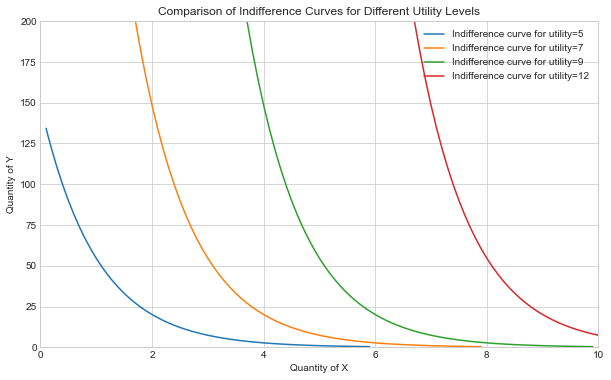

In [10]:
utility_levels = [5, 7, 9, 12]

x_values = np.linspace(0.1, 10, 100)

plt.figure(figsize=(10, 6))

for util in utility_levels:
    ys = np.array([indiff(x, util) for x in x_values])
    plt.plot(x_values, ys, label=f'Indifference curve for utility={util}')

plt.xlabel('Quantity of X')
plt.ylabel('Quantity of Y')
plt.title('Comparison of Indifference Curves for Different Utility Levels')
plt.ylim(0, 200)
plt.xlim(0, 10)
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-11-ca0d77e28963>:7: RuntimeWarning: divide by zero encountered in log
  return x + np.log(y)


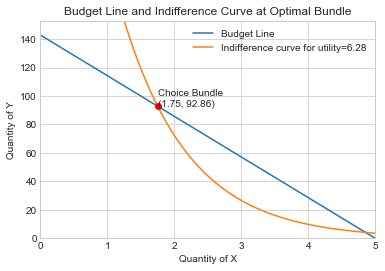

In [11]:
def budget_constraint(x, price_x, price_y, income):
    return (income - price_x * x) / price_y

def objective(x, price_x, price_y, income):
    y = budget_constraint(x, price_x, price_y, income)
    return -myutility(x, y)

price_x = 200
price_y = 7
income = 1000

result = minimize(objective, x0=1, args=(price_x, price_y, income), bounds=[(0, income / price_x)])
optimal_x = result.x[0]
optimal_y = budget_constraint(optimal_x, price_x, price_y, income)

utility_at_optimal_bundle = myutility(optimal_x, optimal_y)

x = np.linspace(0, income / price_x, 100)
plt.plot(x, budget_constraint(x, price_x, price_y, income), label='Budget Line')

indiff_y = np.exp(utility_at_optimal_bundle - x)
plt.plot(x, indiff_y, label=f'Indifference curve for utility={utility_at_optimal_bundle:.2f}')

plt.plot(optimal_x, optimal_y, 'ro') 
plt.text(optimal_x, optimal_y, f'Choice Bundle\n({optimal_x:.2f}, {optimal_y:.2f})')

plt.ylim(0, budget_constraint(0, price_x, price_y, income) + 10)
plt.xlim(0, income / price_x)
plt.xlabel('Quantity of X')
plt.ylabel('Quantity of Y')
plt.title('Budget Line and Indifference Curve at Optimal Bundle')
plt.legend()
plt.grid(True)
plt.show()


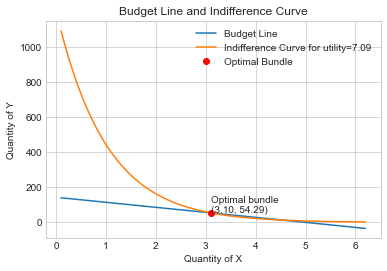

In [12]:
def budget_constraint2(x, price_x, price_y, income):
    return (income - price_x * x) / price_y

def objective2(x, price_x, price_y, income):
    y = budget_constraint(x, price_x, price_y, income)
    if y <= 0:
        return np.inf  
    return -myutility(x, y) 

result = minimize(objective2, x0=0.5 * income / price_x, bounds=[(0, income / price_x)], args=(price_x, price_y, income))
optimal_x = result.x[0]
optimal_y = budget_constraint2(optimal_x, price_x, price_y, income)

utility_at_optimal_bundle = myutility(optimal_x, optimal_y)

x_values = np.linspace(0.1, optimal_x * 2, 100)  

y_budget = budget_constraint2(x_values, price_x, price_y, income)
y_indiff = np.exp(utility_at_optimal_bundle - x_values)

plt.plot(x_values, y_budget, label='Budget Line')
plt.plot(x_values, y_indiff, label=f'Indifference Curve for utility={utility_at_optimal_bundle:.2f}')
plt.plot(optimal_x, optimal_y, 'ro', label='Optimal Bundle')
plt.text(optimal_x, optimal_y, f'Optimal bundle\n({optimal_x:.2f}, {optimal_y:.2f})')
plt.xlabel('Quantity of X')
plt.ylabel('Quantity of Y')
plt.title('Budget Line and Indifference Curve')
plt.legend()
plt.grid(True)

plt.show()


<ipython-input-13-b326d229ccba>:33: RuntimeWarning: divide by zero encountered in log
  indifference_curve_y = np.exp(utility_optimal - np.log(xf_values))


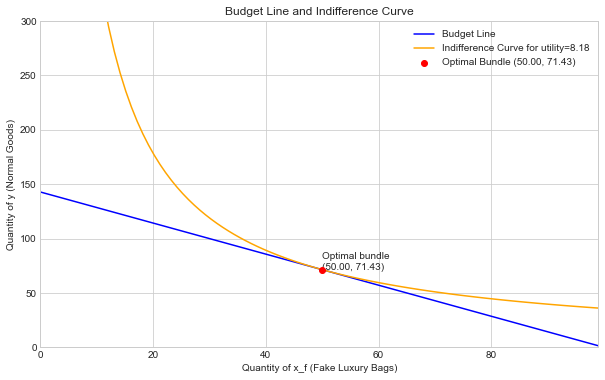

In [13]:
def utility_of_xf(xf, income=1000, price_xf=10, price_y=7):
    y = (income - price_xf * xf) / price_y
    if xf <= 0 or y <= 0:
        return -np.inf
    return np.log(xf) + np.log(y)

income = 1000 
price_xf = 10 
price_y = 7   

result = minimize_scalar(lambda xf: -utility_of_xf(xf, income, price_xf, price_y), bounds=(0, income / price_xf), method='bounded')

if result.success:
    xf_optimal = result.x
    y_optimal = (income - price_xf * xf_optimal) / price_y
    utility_optimal = utility_of_xf(xf_optimal, income, price_xf, price_y)
else:
    raise ValueError("Optimization failed.")

xf_values = np.linspace(0, income / price_xf, 100)
y_values_budget_line = (income - price_xf * xf_values) / price_y

indifference_curve_y = np.exp(utility_optimal - np.log(xf_values))

plt.figure(figsize=(10, 6))
plt.plot(xf_values, y_values_budget_line, label='Budget Line', color='blue')
plt.plot(xf_values, indifference_curve_y, label='Indifference Curve for utility={:.2f}'.format(utility_optimal), color='orange')
plt.scatter([xf_optimal], [y_optimal], color='red', zorder=5, label='Optimal Bundle ({:.2f}, {:.2f})'.format(xf_optimal, y_optimal))
plt.text(xf_optimal, y_optimal, f'Optimal bundle\n({xf_optimal:.2f}, {y_optimal:.2f})')
plt.xlabel('Quantity of x_f (Fake Luxury Bags)')
plt.ylabel('Quantity of y (Normal Goods)')
plt.title('Budget Line and Indifference Curve')
plt.ylim(0, 300)
plt.xlim(0, 99)
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-14-6553b775d538>:33: RuntimeWarning: divide by zero encountered in log
  indifference_curve_y = np.exp(utility_optimal - np.log(xf_values))


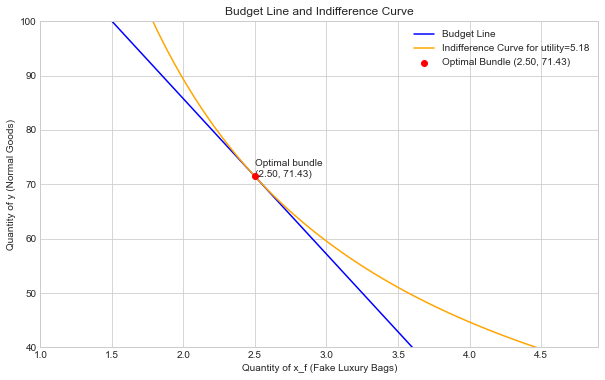

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(xf_values, y_values_budget_line, label='Budget Line', color='blue')
plt.plot(xf_values, indifference_curve_y, label='Indifference Curve for utility={:.2f}'.format(utility_optimal), color='orange')
plt.scatter([xf_optimal], [y_optimal], color='red', zorder=5, label='Optimal Bundle ({:.2f}, {:.2f})'.format(xf_optimal, y_optimal))
plt.text(xf_optimal, y_optimal, f'Optimal bundle\n({xf_optimal:.2f}, {y_optimal:.2f})')
plt.xlabel('Quantity of x_f (Fake Luxury Bags)')
plt.ylabel('Quantity of y (Normal Goods)')
plt.title('Budget Line and Indifference Curve')
plt.ylim(40, 100)
plt.xlim(1, 4.9)
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-15-8187e501991d>:16: RuntimeWarning: divide by zero encountered in log
  indifference_curve_optimal_y = np.exp(utility_optimal - np.log(xf_values))
<ipython-input-15-8187e501991d>:17: RuntimeWarning: divide by zero encountered in log
  indifference_curve_fixed_y = np.exp(utility_fixed - np.log(xf_values))
<ipython-input-15-8187e501991d>:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(xf_values, indifference_curve_fixed_y, 'g--', label='Indifference Curve for utility=7.09', color='green')  # Dotted line


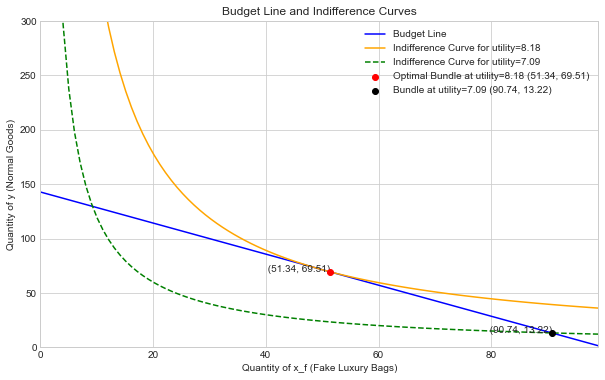

In [15]:
income = 1000 
price_xf = 10  
price_y = 7    
utility_optimal = 8.18  
utility_fixed = 7.09  

xf_values = np.linspace(0, income / price_xf, 100)
y_values_budget_line = (income - price_xf * xf_values) / price_y

indifference_curve_optimal_y = np.exp(utility_optimal - np.log(xf_values))
indifference_curve_fixed_y = np.exp(utility_fixed - np.log(xf_values))

def find_intersection(utility, income, price_xf, price_y):
    return fsolve(lambda xf: np.exp(utility - np.log(xf)) - ((income - price_xf * xf) / price_y), income / (price_xf + price_y))

xf_intersection_optimal = find_intersection(utility_optimal, income, price_xf, price_y)[0]
y_intersection_optimal = (income - price_xf * xf_intersection_optimal) / price_y

xf_intersection_fixed = find_intersection(utility_fixed, income, price_xf, price_y)[0]
y_intersection_fixed = (income - price_xf * xf_intersection_fixed) / price_y

plt.figure(figsize=(10, 6))
plt.ylim(0, 300)
plt.xlim(0, 99)
plt.plot(xf_values, y_values_budget_line, label='Budget Line', color='blue')
plt.plot(xf_values, indifference_curve_optimal_y, label='Indifference Curve for utility=8.18', color='orange')
plt.plot(xf_values, indifference_curve_fixed_y, 'g--', label='Indifference Curve for utility=7.09', color='green') 
plt.scatter(xf_intersection_optimal, y_intersection_optimal, color='red', zorder=5, label=f'Optimal Bundle at utility=8.18 ({xf_intersection_optimal:.2f}, {y_intersection_optimal:.2f})')
plt.scatter(xf_intersection_fixed, y_intersection_fixed, color='black', zorder=5, label=f'Bundle at utility=7.09 ({xf_intersection_fixed:.2f}, {y_intersection_fixed:.2f})')
plt.text(xf_intersection_optimal, y_intersection_optimal, f' ({xf_intersection_optimal:.2f}, {y_intersection_optimal:.2f})', ha='right')
plt.text(xf_intersection_fixed, y_intersection_fixed, f' ({xf_intersection_fixed:.2f}, {y_intersection_fixed:.2f})', ha='right')
plt.xlabel('Quantity of x_f (Fake Luxury Bags)')
plt.ylabel('Quantity of y (Normal Goods)')
plt.title('Budget Line and Indifference Curves')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
def myutility(x, y):
    if x <= 0 or y <= 0:
        return -np.inf 
    return x + np.log(y)

def myutility_derivative(x, income, price1, price2):
    y = (income - price1 * x) / price2
    if y <= 0:
        return np.inf  
    return 1 - (price1 / price2) / y

def mydemand(income, price1, price2):
    start_x = 3
    
    optimal_x = newton(myutility_derivative, start_x, args=(income, price1, price2))
    
    if optimal_x < 0 or (income - price1 * optimal_x) < 0:
        return np.nan, np.nan
    
    optimal_y = (income - price1 * optimal_x) / price2
    return optimal_x, optimal_y

income = 1000
price1 = 200
price2 = 7

optimal_x, optimal_y = mydemand(income, price1, price2)
print(f"Optimal values: x ≈ {optimal_x:.2f}, y ≈ {optimal_y:.2f}")


Optimal values: x ≈ 4.00, y ≈ 28.57


In [17]:
def myutility(x, y):
    if x <= 0 or y <= 0:
        return -np.inf  
    return np.log(x) + np.log(y)

def myutility_derivative(x, income, price1, price2):
    y = (income - price1 * x) / price2
    if x <= 0 or y <= 0:
        return np.inf
    return 1/x - (price1 / price2) / y

def mydemand(income, price1, price2):
    start_x = 15
    optimal_x = newton(myutility_derivative, start_x, args=(income, price1, price2))

    optimal_y = (income - price1 * optimal_x) / price2
    return optimal_x, optimal_y

income = 5000
price1 = 200
price2 = 7

optimal_x, optimal_y = mydemand(income, price1, price2)
print(f"Optimal values: x ≈ {optimal_x:.2f}, y ≈ {optimal_y:.2f}")


Optimal values: x ≈ 12.50, y ≈ 357.14


In [18]:
income = 1000
new_price_x = 200
price_y = 7
utility_level = 5.18  # The given utility level

def find_x_on_indifference_curve(x):
    y = np.exp(utility_level - np.log(x))
    return new_price_x * x + price_y * y - income

initial_guess_x = 50

new_optimal_x = newton(find_x_on_indifference_curve, initial_guess_x)
new_optimal_y = np.exp(utility_level - np.log(new_optimal_x))

print(f"New optimal bundle on the same indifference curve: x = {new_optimal_x:.2f}, y = {new_optimal_y:.2f}")


New optimal bundle on the same indifference curve: x = 2.68, y = 66.39


In [19]:
income = 1000
old_price_x = 10
price_y = 7
utility_level = 5.18

initial_guess_x = 50

old_optimal_x = newton(find_x_on_indifference_curve, initial_guess_x)
old_optimal_y = np.exp(utility_level - np.log(old_optimal_x))

print(f"Old optimal bundle on the same indifference curve: x = {old_optimal_x:.2f}, y = {old_optimal_y:.2f}")


Old optimal bundle on the same indifference curve: x = 98.74, y = 1.80


In [109]:
def difference_in_indirect_utilities(income_to_be_found,longlist):
    income1=longlist[0]
    px1 = longlist[1]
    py1 = longlist[2]
    px2 = longlist[3]
    py2 = longlist[4]
    return my_indirect_utility(income1,px1,py1)-my_indirect_utility(income_to_be_found,px2,py2)

a = our_newton_solver(difference_in_indirect_utilities,1.01,[1000,200,7,10,7]) 
print(a)

223.60679774997763


1.7795169323944573


<ipython-input-412-9c3aea300cbe>:2: RuntimeWarning: invalid value encountered in log
  return 0.8*np.log(x)+0.2*np.log(y)


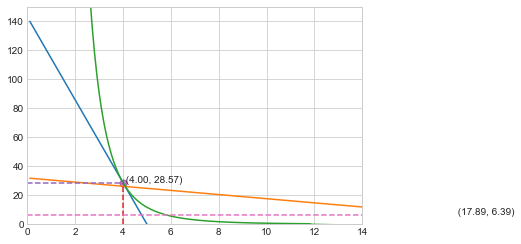

In [458]:
x=np.linspace(0.1,100,1000)
plt.plot(x,(1000-200*x)/7)
plt.plot(x,(223.6069-10*x)/7)

def mydemand(income,price1,price2):
    x=our_newton_maximizer(myutility_included_budget,0.1,[income,price1,price2])
    y = (income-price1*x)/price2
    return x,y

utility_level = my_indirect_utility(1000,200,7)
y1=np.zeros((1000,1))
i=0
for element in x:
    y1[i]=indiff(x[i],utility_level)
    i+=1

plt.plot(x,y1)

dems1=mydemand(1000,200,7)
dems3=mydemand(223.6069,10,7)

plt.scatter(dems1[0],dems1[1],s=50,alpha=0.5,color='purple')
plt.scatter(dems3[0],dems3[1],s=50,alpha=0.5,color='purple')
plt.text(dems1[0], dems1[1], f' ({dems1[0]:.2f}, {dems1[1]:.2f})')
plt.text(dems3[0], dems3[1], f' ({dems3[0]:.2f}, {dems3[1]:.2f})', ha='left',)

plt.plot((dems1[0], dems1[0]), (0, dems1[1]), '--')
plt.plot((0, dems1[0]), (dems1[1], dems1[1]), '--')

plt.plot((dems3[0], dems3[0]), (0, dems3[1]), '--')
plt.plot((0, dems3[0]), (dems3[1], dems3[1]), '--')

plt.ylim(0, 150)
plt.xlim(0,14)

print(utility_level)

So, doing the Slutsky decomposition, the demand change in x of a substitution effect from 2.4999999996769455 to 11.18034505680577 (the relative price of x and y has changed)

In [232]:
x_new = 111.18
y_new = 15.97

MRS_new = -y_new / x_new
print(f"The Marginal Rate of Substitution at the new bundle is: {MRS_new:.4f}")


The Marginal Rate of Substitution at the new bundle is: -0.1436


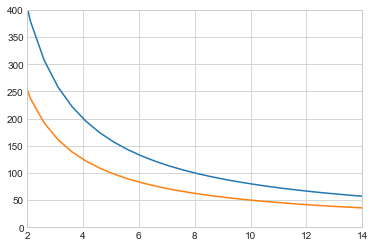

In [243]:
def myutility_ql(x,y):
    return np.log(x)+np.log(y)

def myutility_ql_included_budget(x,mylist):
    income=mylist[0]
    price1=mylist[1]
    price2=mylist[2]
    y = (income-price1*x)/price2
    return -myutility_ql(x,y)

def mydemand_ql(income,price1,price2):
    x_res=opt.minimize(myutility_ql_included_budget,1,[income,price1,price2])
    x=x_res['x']
    y = (income-price1*x)/price2
    return x,y

def myindutility_ql(income,price1,price2):
    x,y = mydemand_ql(income,price1,price2)
    return myutility_ql(x,y)

def myutility(x,y):
    return 0.8*np.log(x)+0.2*np.log(y)

def myutility_included_budget(x,mylist):
    income=mylist[0]
    price1=mylist[1]
    price2=mylist[2]
    y = (income-price1*x)/price2
    return -myutility(x,y) 

def mydemand(income,price1,price2):
    x_res=opt.minimize(myutility_included_budget,1,[income,price1,price2])
    x=x_res['x']
    y = (income-price1*x)/price2
    return x,y

def myindutility(income,price1,price2):
    x,y = mydemand(income,price1,price2)
    return myutility(x,y)

prices = np.linspace(0.1,500,1000)
dem1 = np.zeros(1000)
dem2 = np.zeros(1000)

for i in range(1000):
    dem1[i],y=mydemand(1000,prices[i],7)
    dem2[i],y=mydemand_ql(1000,prices[i],7)
 
plt.ylim(0, 400)
plt.xlim(2,14)
plt.plot(prices,dem1)
plt.plot(prices,dem2)

12.18726155267223


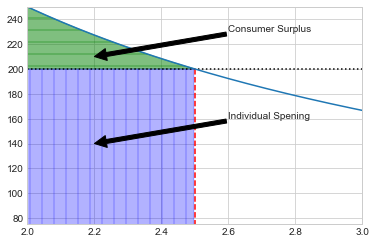

In [382]:
prices = np.linspace(0.1,500,1000)
dem1 = np.zeros(1000)

for i in range(1000):
    dem1[i],y=mydemand_ql(1000,prices[i],7)

ypos = 200
text = "old price" 
plt.hlines(y=ypos, xmin=2, xmax=20, color = 'black', linestyles="dotted")

plt.plot((dems1[0], dems1[0]), (200, dems1[1]), 'r--')
plt.plot((200, dems1[0]), (dems1[1], dems1[1]), 'r--')

plt.ylim(75, 250)
plt.xlim(2,3)
plt.plot(dem1,prices)

plt.fill_between(dem1, prices, 200, where = (prices > 200), color = 'green', alpha = 0.5, hatch = '-')
plt.fill_between(dem1, 200, where = (dem1<2.5), color = 'blue', alpha = 0.3, hatch = '|')

plt.annotate('Consumer Surplus', xy=(2.2, 210), xytext=(2.6, 230), arrowprops=dict(facecolor='black'))
plt.annotate('Individual Spening', xy = (2.2, 140), xytext = (2.6,160), arrowprops=dict(facecolor='black'))

Text(2.6, 160, 'Individual Spening')

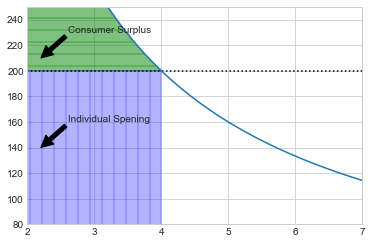

In [412]:
prices = np.linspace(0.1,500,1000)
dem2 = np.zeros(1000)

for i in range(1000):
    dem2[i],y=mydemand(1000,prices[i],7)

ypos = 200 
text = "old price" 
plt.hlines(y=ypos, xmin=0, xmax=30, color = 'black', linestyles="dotted")

plt.ylim(80, 250)
plt.xlim(2,7)
plt.plot(dem2,prices)

plt.fill_between(dem2, prices, 200, where = (prices > 200), color = 'green', alpha = 0.5, hatch = '-')
plt.fill_between(dem2, 200, where = (dem2<4), color = 'blue', alpha = 0.3, hatch = '|')

plt.annotate('Consumer Surplus', xy=(2.2, 210), xytext=(2.6, 230), arrowprops=dict(facecolor='black'))
plt.annotate('Individual Spening', xy = (2.2, 140), xytext = (2.6,160), arrowprops=dict(facecolor='black'))

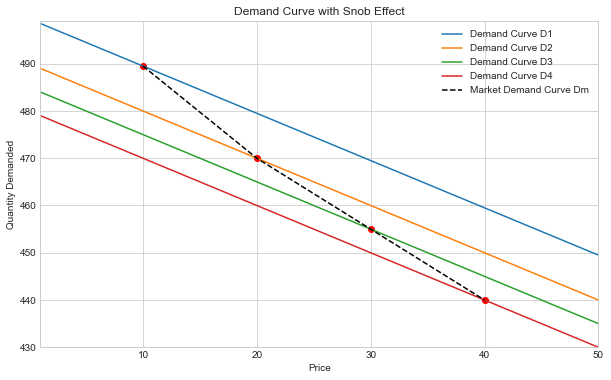

In [445]:
def demand_function(ai, bi, ci, P, Qj):
    return ai - bi * P + ci * Qj

ai = 500  
bi = 1   
ci = -0.0005 

price_range = np.linspace(1, 50, 100) 
Qj_values = [1000, 20000, 30000, 40000] 
demand_curves = [demand_function(ai, bi, ci, price_range, Qj) for Qj in Qj_values]

plt.figure(figsize=(10, 6))
for i, demand_curve in enumerate(demand_curves):
    plt.plot(price_range, demand_curve, label=f'Demand Curve D{i+1}')

equilibrium_prices = [10, 20, 30, 40]
equilibrium_quantities = [demand_function(ai, bi, ci, P, Qj) for P, Qj in zip(equilibrium_prices, Qj_values)]
plt.scatter(equilibrium_prices, equilibrium_quantities, color='red')
plt.plot(equilibrium_prices, equilibrium_quantities, color='black', linestyle='--', label='Market Demand Curve Dm')

plt.xlabel('Price')
plt.ylabel('Quantity Demanded')
plt.title('Demand Curve with Snob Effect')
plt.legend()
plt.grid(True)

plt.ylim(430, 499)
plt.xlim(1,50)
plt.show()


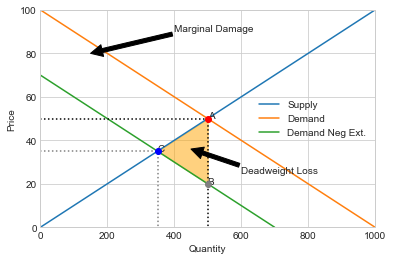

In [516]:
def supply(p):
    return 10 * p

def demand(p):
    return 1000- 10* p

def demand_ls(p):
    return 700 - 10* p 

prices = np.linspace(0, 100, 100)

supply_quantities = supply(prices)
demand_quantities = demand(prices)
demand_loss = demand_ls(prices)

plt.plot(supply_quantities, prices, label='Supply')
plt.plot(demand_quantities, prices, label='Demand')
plt.plot(demand_loss, prices, label='Demand Neg Ext.')

plt.scatter(500, 50, color='red', zorder=5)
plt.text(500, 50, "A")
plt.scatter(500, 20, color='grey', zorder=5)
plt.text(500, 20, "B")
plt.scatter(350, 35, color='blue', zorder=5)
plt.text(350, 35, "C")

plt.xlabel('Quantity')
plt.ylabel('Price')

plt.vlines(x=500, ymin=-5, ymax=50, color = 'black', linestyles="dotted")
plt.hlines(y=50, xmin=0, xmax=500, color = 'black', linestyles="dotted")

plt.vlines(x=350, ymin=-5, ymax=35, color = 'grey', linestyles="dotted")
plt.hlines(y=35, xmin=0, xmax=350, color = 'grey', linestyles="dotted")

plt.fill_between([350, 500], [35, 20], [35, 50], color='orange', alpha=0.5)

plt.annotate('Marginal Damage', xy=(150, 80), xytext=(400, 90), arrowprops=dict(facecolor='black'))
plt.annotate('Deadweight Loss', xy=(450, 36), xytext=(600, 25), arrowprops=dict(facecolor='black'))
plt.legend()
plt.xlim(0,1000)
plt.ylim(0,100)
plt.show()


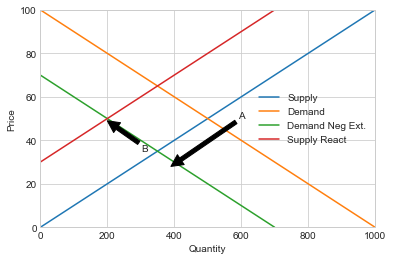

In [554]:
def supply(p):
    return 10 * p

def supply_ls(p):
    return 10 * p - 300

def demand(p):
    return 1000- 10* p

def demand_ls(p):
    return 700 - 10* p 

supply_quantities = supply(prices)
demand_quantities = demand(prices)
demand_loss = demand_ls(prices)
supply_loss = supply_ls(prices)

plt.plot(supply_quantities, prices, label='Supply')
plt.plot(demand_quantities, prices, label='Demand')
plt.plot(demand_loss, prices, label='Demand Neg Ext.')
plt.plot(supply_loss, prices, label='Supply React')

plt.xlabel('Quantity')
plt.ylabel('Price')

plt.legend()
plt.xlim(0,1000)
plt.ylim(0,100)
plt.show()